In [30]:
# Week 3: Day 1 - Data Handling and Visualization

import pandas as pd 

# Load CSV 
df = pd.read_csv('reactor_data.csv')

# Preview the data
print(df.columns)
print(df.head())
print(df.info())
print(df.describe()) 

Index(['Time (min)\tTemp (K)\tPressure (atm)\tConc_A (mol/L)\tConc_B (mol/L)'], dtype='object')
  Time (min)\tTemp (K)\tPressure (atm)\tConc_A (mol/L)\tConc_B (mol/L)
0                                  0\t300\t1.2\t1\t0                  
1                              5\t310\t1.3\t0.8\t0.2                  
2                             10\t320\t1.4\t0.6\t0.4                  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Time (min)	Temp (K)	Pressure (atm)	Conc_A (mol/L)	Conc_B (mol/L)  3 non-null      object
dtypes: object(1)
memory usage: 156.0+ bytes
None
       Time (min)\tTemp (K)\tPressure (atm)\tConc_A (mol/L)\tConc_B (mol/L)
count                                                   3                  
unique                              

In [2]:
# Week 3: Day 2 - Clean and Filter Data

import pandas as pd

df_commas = pd.read_csv('reactor_data.csv') # Commas are used as delimiters
print(df_commas.columns)

df = pd.read_csv('reactor_data.csv', sep='\t')
print(df)

# Drop rows with missing values
df_cleaned = df.dropna()

# Filter: show only high-temp rows
high_temp = df_cleaned[df_cleaned["Temp (K)"] < 320]
print(high_temp)

Index(['Time (min)\tTemp (K)\tPressure (atm)\tConc_A (mol/L)\tConc_B (mol/L)'], dtype='object')
   Time (min)  Temp (K)  Pressure (atm)  Conc_A (mol/L)  Conc_B (mol/L)
0           0       300             1.2             1.0             0.0
1           5       310             1.3             0.8             0.2
2          10       320             1.4             0.6             0.4
   Time (min)  Temp (K)  Pressure (atm)  Conc_A (mol/L)  Conc_B (mol/L)
0           0       300             1.2             1.0             0.0
1           5       310             1.3             0.8             0.2


In [ ]:
# Week 3: Day 3 - Apply Chemical Formulas on Columns

import pandas as pd

# Load CSV
df = pd.read_csv('reactor_data.csv', sep='\t')

CA0 = 1.0
CB0 = 0.5
# Calculate conversion of A
df["Conversion_A"] = (CA0 - df["Conc_A (mol/L)"]) / CA0

# Calculate conversion of B
df["Conversion_B"] = (CB0 - df["Conc_B (mol/L)"]) / CB0

print(df[["Conc_A (mol/L)", "Conversion_A"]].dropna())
print(df[["Conversion_A"]])

   Conc_A (mol/L)  Conversion_A
0             1.0           0.0
1             0.8           0.2
2             0.6           0.4
   Conversion_A
0           0.0
1           0.2
2           0.4


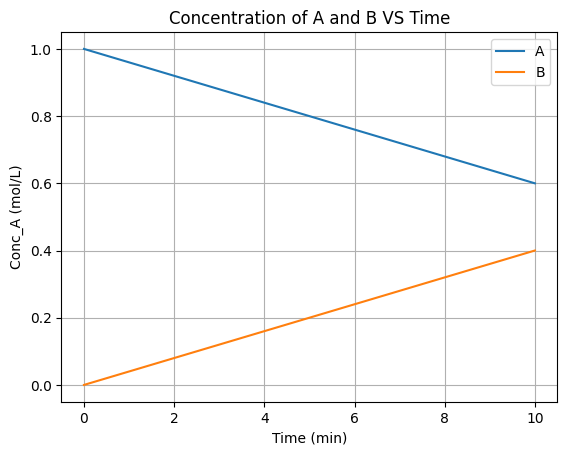

In [2]:
# Week 3: Day 4 - Plot Trends with Matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load CSV
df = pd.read_csv('reactor_data.csv', sep='\t')  

sns.lineplot(data=df, x='Time (min)', y='Conc_A (mol/L)', label='A')
sns.lineplot(data=df, x='Time (min)', y='Conc_B (mol/L)', label='B')
plt.title('Concentration of A and B VS Time')
plt.grid(True)
plt.show()

Index(['Time(min)', 'Temp(K)', 'Pressure(atm)', 'Conc_A(mol/L)',
       'Conc_B(mol/L)'],
      dtype='object')


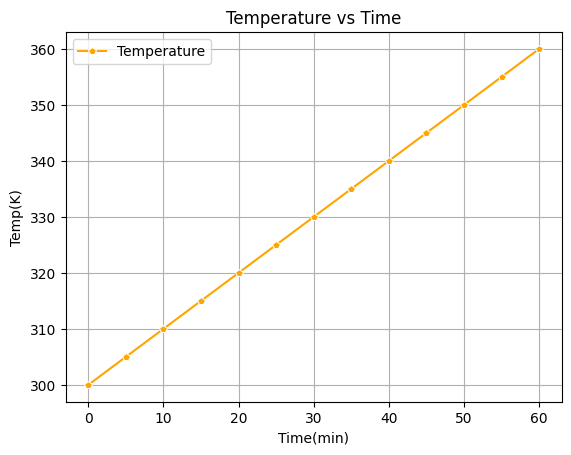

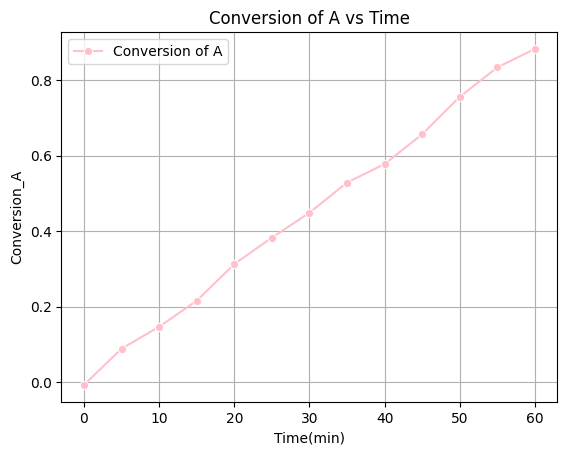

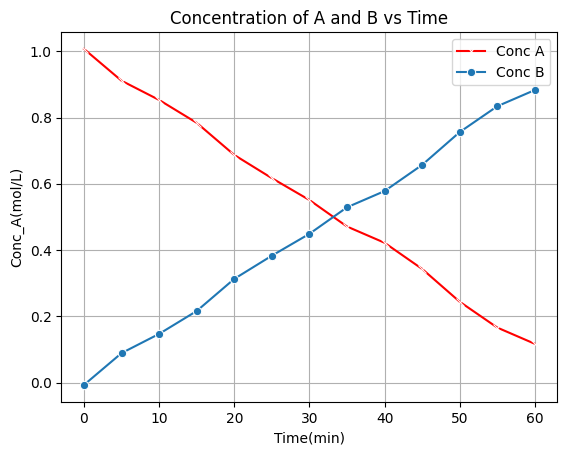

In [13]:
# MINI PROJECT: CSTR Reaction Analysis from CSV

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Load CSV
df = pd.read_csv('reactor_data_sample.csv', sep=',')

# Load CSV with columns without
print(df.columns)

df_cleaned = df.dropna()

# Calculate Conversion of A 
CA0 = 1.0
df_cleaned['Conversion_A'] = (CA0 - df['Conc_A(mol/L)']) / CA0

# Calculate Reaction rate using first order 
k = 0.1 # Example rate constant
df_cleaned['rate_A'] = k * df['Conc_A(mol/L)'] 

# Plotting the data 

# 1 Temp vs Time 
sns.lineplot(data=df_cleaned, x='Time(min)', y='Temp(K)', label='Temperature', marker='p', color='orange')
plt.title('Temperature vs Time')
plt.legend()
plt.grid(True)
plt.show()
# 2 Conversion_A vs Time
sns.lineplot(data=df_cleaned, x='Time(min)', y='Conversion_A', label='Conversion of A', marker='o', color='pink')
plt.title('Conversion of A vs Time')
plt.legend()
plt.grid(True)
plt.show()

# 3 Conc_A and Conc_B vs Time
sns.lineplot(data=df_cleaned, x='Time(min)', y='Conc_A(mol/L)', label='Conc A', marker='x', color='red')
sns.lineplot(data=df_cleaned, x='Time(min)', y='Conc_B(mol/L)', label='Conc B', marker='o')
plt.title('Concentration of A and B vs Time')
plt.legend()
plt.grid(True)
plt.show()
